In [82]:
import sys, os
modules_path = os.path.abspath('../modules')
if modules_path not in sys.path:
    sys.path.append(modules_path)
from microstates import Microstates
from sweep import Equilibrium, Sweep
import numpy as np
import matplotlib.pyplot as plt
from time import time

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [83]:
eq = Equilibrium()

# 25 pM KD for ETS-1 and specific sites
dG_specific = eq.get_dG(25e-12)

# 10 uM KD for ETS-1 and non-specific sites (no overlap, <10um for overlap)
dG_nonspecific = eq.get_dG(10e-6)

print(dG_specific)
print(dG_nonspecific)

-14.553574695482832
-6.8635598682647725


In [84]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043

# alpha = [.96*(a0+c0), a0] 
# beta = [.8*(b0+c0), b0] 
# gamma = [0, .7*c0] 

alpha = [dG_specific, a0] 
beta = [dG_nonspecific, b0] 
gamma = [.8*c0, c0] 

params = dict(alpha=alpha, beta=beta, gamma=gamma)

In [130]:
Ns = 10
density = (25, 25)

In [135]:
#%%prun -D ../profiling/light.prof
start = time()
microstates = Microstates(Ns=Ns, params=params, ets=(0,))
sweep = Sweep(cmin=(0, 0), cmax=(10, 10), density=density)
sweep.set_occupancies(microstates)
print(time()-start)

0.9439449310302734


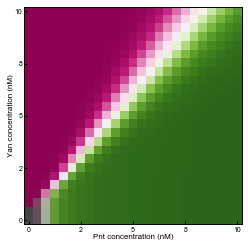

In [136]:
fig = sweep.plot_overall_occupancy(species='Pnt', cmap=plt.cm.PiYG, mask=True)

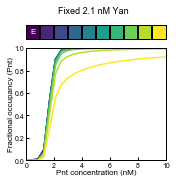

In [137]:
fig = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=5, figsize=(2.5, 2.5))

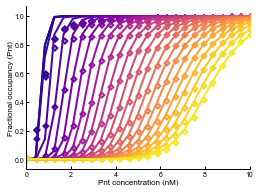

In [138]:
_ = sweep.show_model()

In [127]:
sweep.model.hill_coefficient

array([2.82050521, 5.47216189])

In [128]:
sweep.model.km

array([0.6728849 , 0.90534954])

In [129]:
sweep.model.result

     fun: 32.573799271166216
     jac: array([-1.71661377e-05, -3.81469727e-06, -9.77516174e-05, -1.30653381e-04])
 message: 'Optimization terminated successfully.'
    nfev: 292
     nit: 46
    njev: 45
  status: 0
 success: True
       x: array([2.82050521, 5.47216189, 0.6728849 , 0.90534954])

In [79]:
from scipy.optimize import minimize

In [81]:
minimize()

<function scipy.optimize._minimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)>

In [427]:
occupancies = rsweep.occupancies.mean(axis=0)[:, 1:]
concentrations = rsweep.concentrations

In [429]:
fit = ModelFit(concentrations*1e9, occupancies)

In [430]:
rsweep.density

(25, 25)

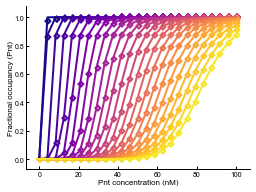

In [477]:
cmap = plt.cm.plasma
norm = Normalize(0, rsweep.density[1])

fig, ax = plt.subplots(figsize=(4, 3))

for y in range(0, rsweep.density[1]):
    
    pnt = fit.x[y::rsweep.density[1], 0]
    yan = fit.x[y::rsweep.density[1], 1]
    
    yd = fit.y[y::rsweep.density[1], 0]
    yp = fit.yp[y::rsweep.density[1], 0]
    
    color = cmap(norm(y))
    ax.plot(pnt, yp, '-', color=color, linewidth=2)
    ax.scatter(pnt, yd, c=color, s=50, marker=r'$\diamond$')

_ = ax.set_ylabel('Fractional occupancy (Pnt)', fontsize=8)
_ = ax.set_xlabel('Pnt concentration (nM)', fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlim(0, 2)

In [309]:
x = np.array([100, 0])
n = np.array([3, 3])
km = np.array([1, 1])

fit.model(fit.x[-1], n, km)

array([0.999999, 0.      ])

In [312]:
fit._predict(fit.x[-1], p)

array([0.999999, 0.      ])

In [308]:
fit.x[-1]

array([100.,   0.])

In [212]:
out

array([3.57188718e-01, 5.30435443e-06, 2.79620033e-11, 7.45861769e+01])

In [197]:
from scipy.optimize import fmin

In [ ]:
fmin()

In [157]:
from matplotlib.colors import Normalize

def plot_coverage(xc, tc, ax, cmap=plt.cm.Greens):
    
    # apply transparency
    norm = Normalize(0, 1)
    colors = cmap(norm(xc))
    colors[:, :, -1] = tc**2
        
    bg = np.empty(xc.shape + (3,), dtype=np.uint8)
    bg.fill(70)
    ax.imshow(bg)
    
    # show
    ax.imshow(colors)
    ax.invert_yaxis()
    ax.set_xlabel('Pnt Concentration')
    ax.set_ylabel('Yan Concentration')

    


In [152]:
x = np.array([10, 10])

In [172]:
n = np.array([5, 5])
km = np.array([50, 50])

In [185]:
coverage

array([0.86298667, 0.04567111])

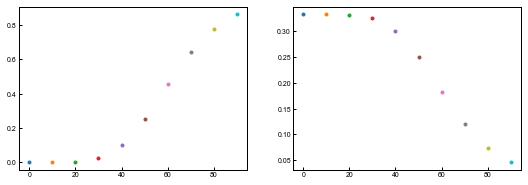

In [184]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 3))
for x0 in np.arange(0, 100, 10):
    x = np.array([x0, 50])
    coverage = competitive(x, n, km)
    
    ax0.plot(x0, coverage[0], '.')
    ax1.plot(x0, coverage[1], '.')